In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_recent = pd.read_csv('../data/energy_recent_clean.csv', index_col = 'date')
df_past = pd.read_csv('../data/energy_past_clean.csv', index_col = 'date')
pred_lower = pd.read_csv('../data/lower_predictions.csv', index_col = 'ds')
pred_mid = pd.read_csv('../data/midrange_predictions.csv', index_col = 'ds')
pred_upper = pd.read_csv('../data/upper_predictions.csv', index_col = 'ds')

df_recent.set_index(pd.to_datetime(df_recent.index), inplace = True)
df_past.set_index(pd.to_datetime(df_past.index), inplace = True)
pred_lower.set_index(pd.to_datetime(pred_lower.index), inplace = True)
pred_mid.set_index(pd.to_datetime(pred_mid.index), inplace = True)
pred_upper.set_index(pd.to_datetime(pred_upper.index), inplace = True)

In [3]:
pred_mid.head()

,coal,ngas,other,nuclear,hydro,wind,geo,solar,bio,petroleum,renewables,nonrenewables,total,renewable percent,nonrenewable percent
ds,,,,,,,,,,,,,,,
2001-01-01,174042.011175,44483.564855,823.251575,70399.396255,22418.459983,844.292784,1222.169092,14.654761,4337.558852,14493.017665,28837.135472,304241.241525,333078.376997,0.086578,0.913422
2001-02-01,150330.544240,39495.543292,761.170483,60755.894096,20078.880804,793.023183,1086.037597,17.383624,3884.460604,10306.142815,25859.785812,261649.294926,287509.080738,0.089944,0.910056
2001-03-01,147655.673411,43842.262644,880.888217,62020.311632,21839.778252,977.037369,1197.861512,25.568231,4184.048146,10549.352475,28224.293510,264948.488379,293172.781889,0.096272,0.903728
2001-04-01,134067.234696,42299.483978,848.908503,55837.384223,21946.127587,988.357461,1127.617630,29.039693,3945.580034,9665.162274,28036.722405,242718.173674,270754.896079,0.103550,0.896450
2001-05-01,147482.723118,46878.597359,875.183172,61866.275371,24506.493759,912.756438,1171.857187,33.592916,4088.191856,9776.523949,30712.892155,266879.302967,297592.195123,0.103205,0.896795


In [4]:
errors = {
    'Coal': 8490.156403017965,
    'Natural Gas':11943.975587108984,
    'Nuclear':3220.931184127836,
    'Petroleum': 1071.313800411348,
    'Other Gases':87.9536085192484,
    'Wind':5691.517791985315,
    'Solar':1493.4232700247924,
    'Hydroelectric': 2757.503247227439,
    'Geothermal': 57.18855074779286,
    'Biomass':457.99136833204983
}

In [5]:
rmse = pd.Series()
for key in errors.keys():
    rmse[key] = errors[key]
rmse.sort_values(ascending = False, inplace = True)

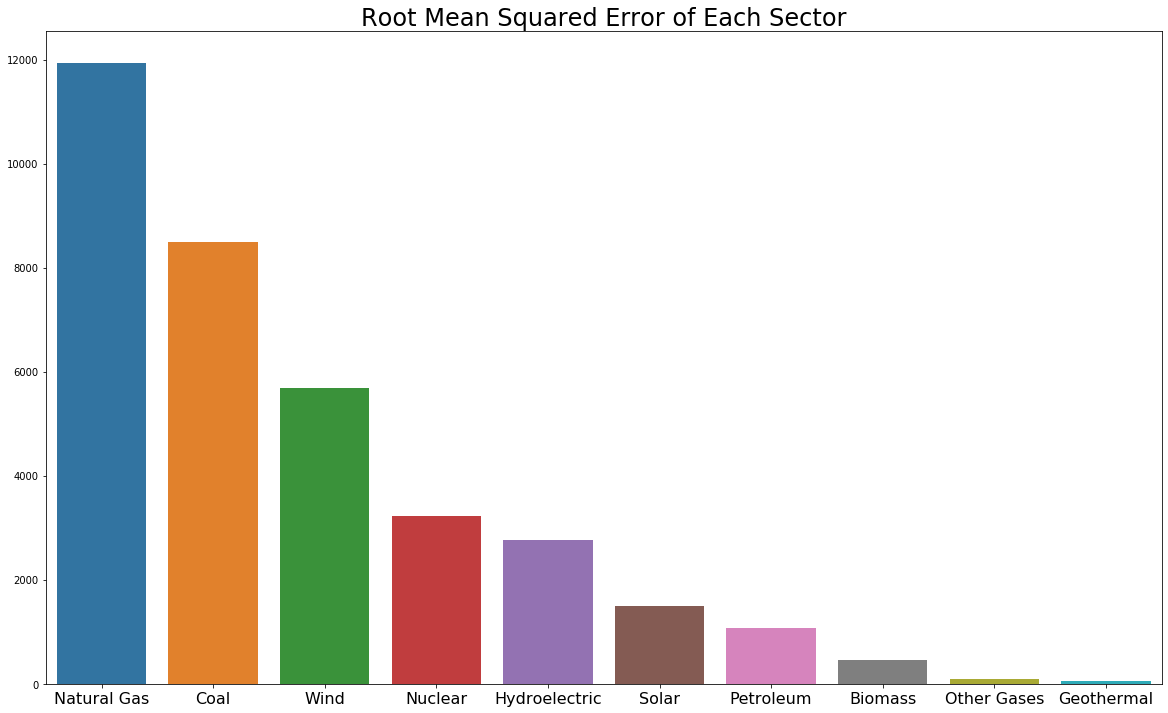

In [6]:
plt.figure(figsize = (20,12))
sns.barplot(x = rmse.index, y = rmse.values)
plt.xticks(fontsize = 16)
plt.title("Root Mean Squared Error of Each Sector", size = 24);

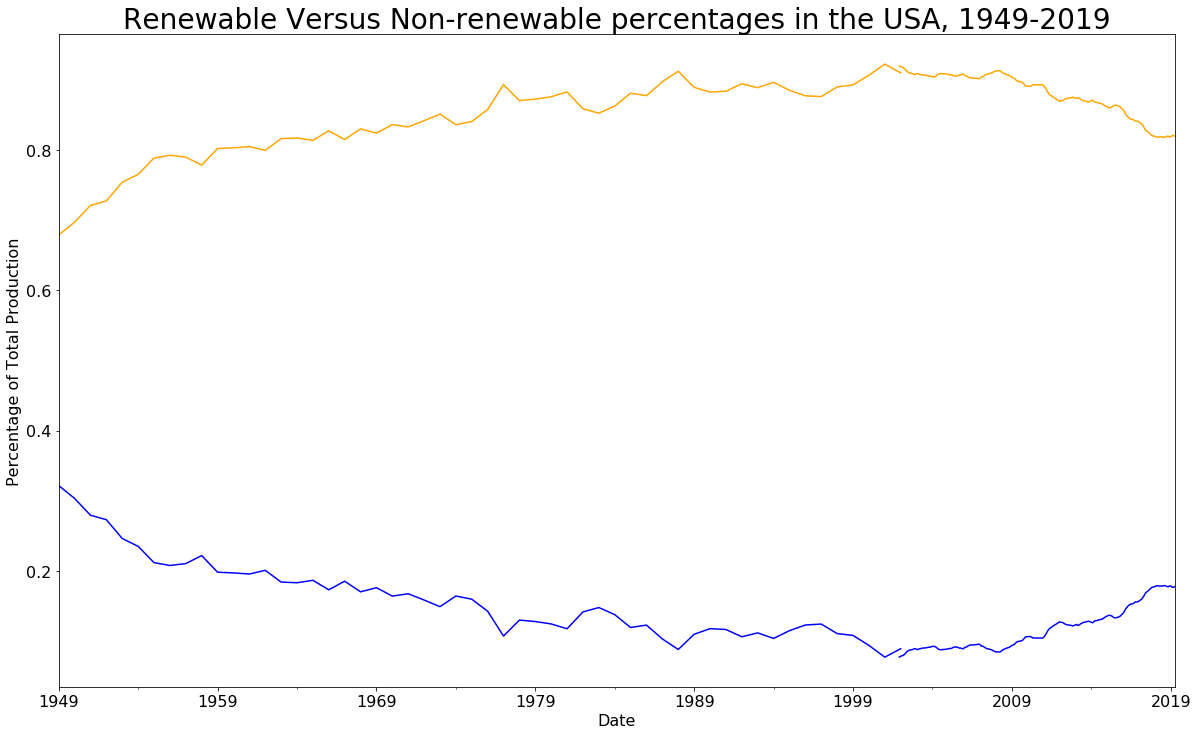

In [7]:
plt.figure(figsize = (20,12))
df_past['Renewable Percentage'][:'2002-12-01'].plot(color = 'blue')
df_past['Nonrenewable Percentage'][:'2002-12-01'].plot(color = 'orange')
df_recent['Renewable Percentage'].rolling(12).mean().plot(color = 'blue')
df_recent['Nonrenewable Percentage'].rolling(12).mean().plot(color = 'orange')
plt.title("Renewable Versus Non-renewable percentages in the USA, 1949-2019", size = 28)
plt.ylabel('Percentage of Total Production', size = 16)
plt.xlabel("Date", size = 16)
plt.xticks(size = 16)
plt.yticks(size = 16);


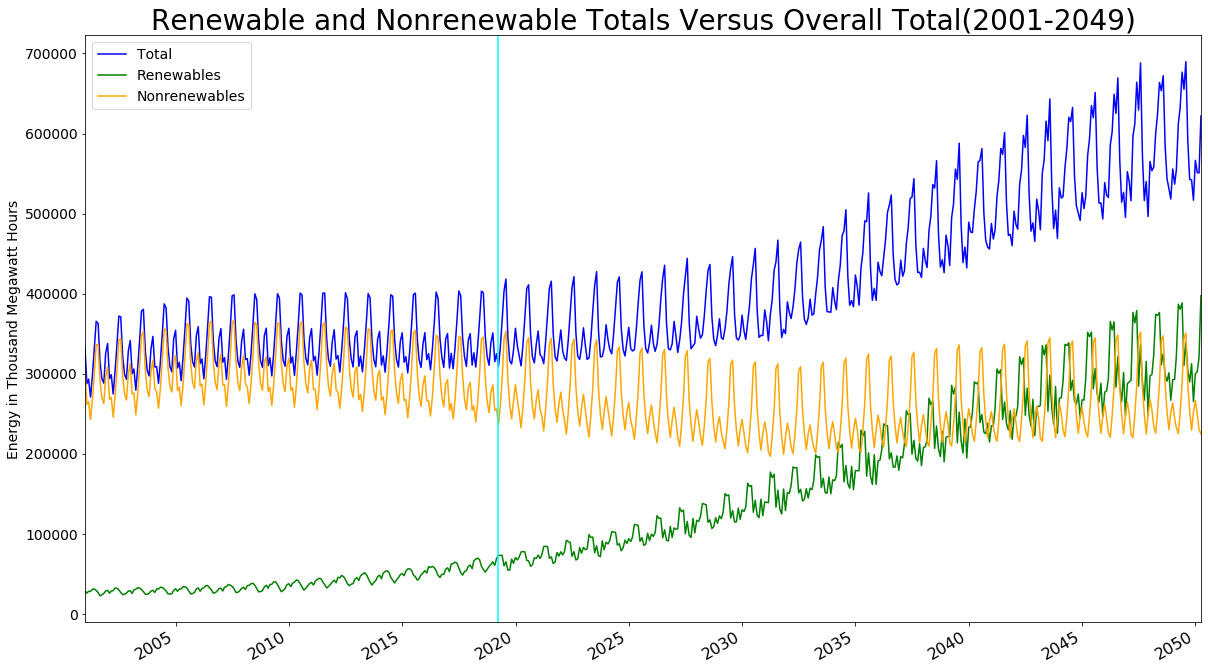

In [8]:
plt.figure(figsize = (20,12))
pred_mid['total'].plot(label = 'Total', color = 'blue')
pred_mid['renewables'].plot(label = 'Renewables', color = 'green')
pred_mid['nonrenewables'].plot(label = "Nonrenewables", color = 'orange')
plt.title("Renewable and Nonrenewable Totals Versus Overall Total(2001-2049)", size = 28)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 14)
plt.xlabel("")
plt.ylabel("Energy in Thousand Megawatt Hours", fontsize = 14)
plt.axvline('04-01-2019', color = 'cyan')
plt.legend(fontsize = 14);

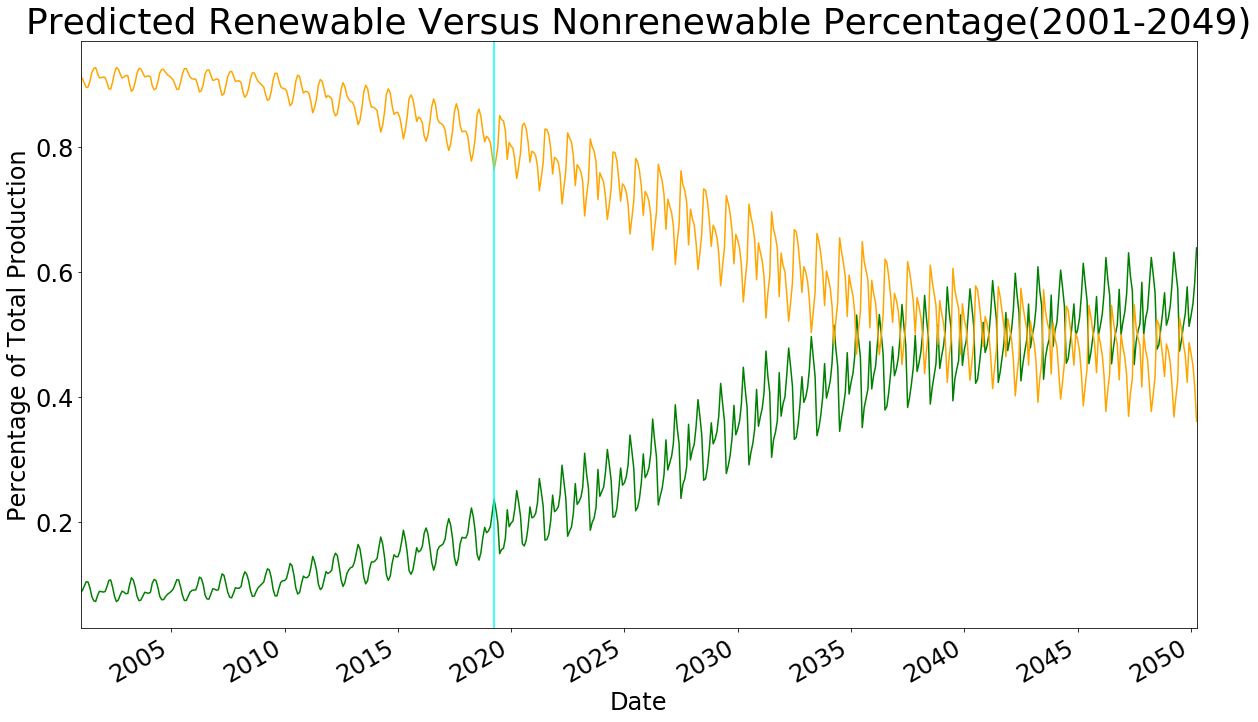

In [9]:
plt.figure(figsize = (20,12))
pred_mid['renewable percent'].plot(color = 'green')
pred_mid['nonrenewable percent'].plot(color = 'orange')
plt.title("Predicted Renewable Versus Nonrenewable Percentage(2001-2049)", size = 36)
plt.ylabel('Percentage of Total Production', size = 24)
plt.xlabel("Date", size = 24)
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.axvline('04-01-2019', color = 'cyan');

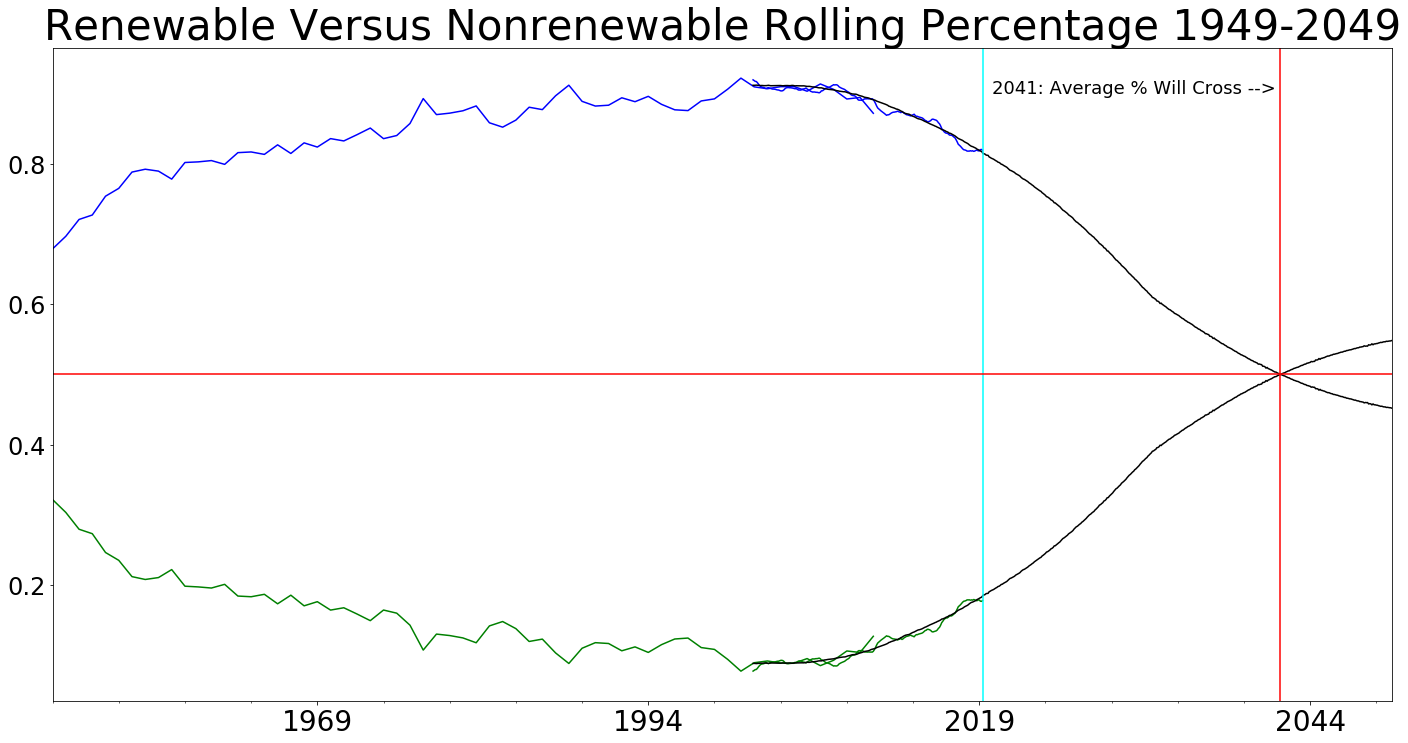

In [10]:
plt.figure(figsize = (24,12))

df_past['Renewable Percentage'].plot(color = 'green')
df_recent['Renewable Percentage'].rolling(12).mean().plot(color = 'green')
pred_mid['renewable percent'].rolling(12).mean().plot(color = 'black', label = "Mid")
#pred_lower['renewable percent'].rolling(12).mean().plot(color = 'blue', label = 'Low')
#pred_upper['renewable percent'].rolling(12).mean().plot(color = 'red', label = 'High')

df_past['Nonrenewable Percentage'].plot(color = 'blue')
df_recent['Nonrenewable Percentage'].rolling(12).mean().plot(color = 'blue')
pred_mid['nonrenewable percent'].rolling(12).mean().plot(color = 'black', label = "Mid")
#pred_lower['nonrenewable percent'].rolling(12).mean().plot(color = 'blue', label = 'Low')
#pred_upper['nonrenewable percent'].rolling(12).mean().plot(color = 'red', label = 'High')
plt.title('Renewable Versus Nonrenewable Rolling Percentage 1949-2049', size = 42)
plt.xticks(fontsize = 28)
plt.yticks(fontsize = 24)
plt.xlabel("")

plt.axvline('2041-10-30', color = 'red')
plt.axvline('04-01-2019', color = 'cyan')

plt.text('2020', 0.9, '2041: Average % Will Cross -->', size = 18)

plt.axhline(0.5, color = 'red');

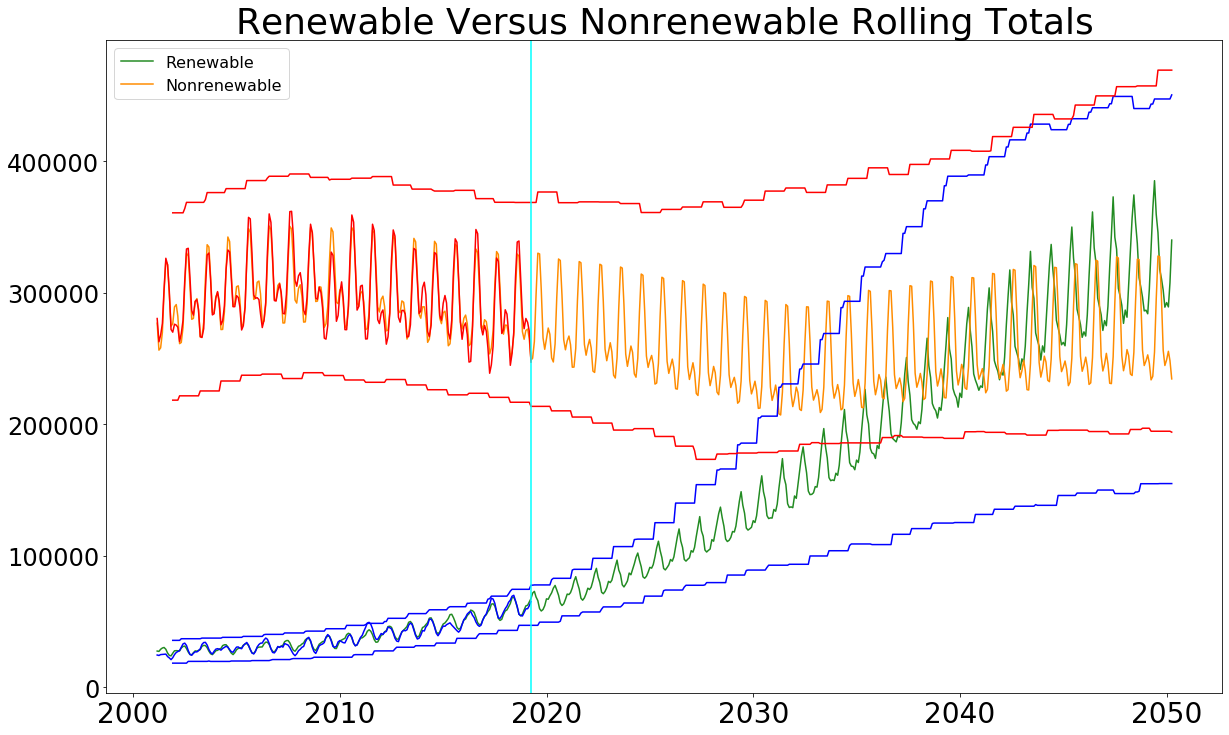

In [59]:
plt.figure(figsize = (20,12))

sns.lineplot(data = pred_mid['renewables'].rolling(3).mean(), color = 'forestgreen', dashes= True)
sns.lineplot(data = pred_mid['nonrenewables'].rolling(3).mean(), color = 'darkorange', dashes = True)

sns.lineplot(data = df_recent['Renewable Total'].rolling(3).mean(), color = 'blue' )
sns.lineplot(data = df_recent['Nonrenewable Total'].rolling(3).mean(), color = 'red')

sns.lineplot(data = pred_lower['renewables'].rolling(12).min(), color = 'blue')
sns.lineplot(data = pred_upper['renewables'].rolling(12).max(), color = 'blue')


sns.lineplot(data = pred_lower['nonrenewables'].rolling(12).min(), color = 'red')
sns.lineplot(data = pred_upper['nonrenewables'].rolling(12).max(), color = 'red')

plt.legend(['Renewable', 'Nonrenewable'], fontsize = 16)
plt.title("Renewable Versus Nonrenewable Rolling Totals", size = 36)
plt.xticks(fontsize = 28)
plt.xlabel("")
plt.yticks(fontsize = 24)
plt.axvline('04-01-2019', color = 'cyan');

In [12]:
features = ['renewables', 'nonrenewables', 'renewable percent', 'nonrenewable percent', 'total'] 

In [13]:
pred_mid[pred_mid['renewables'] > pred_mid['nonrenewables']][features].head()

,renewables,nonrenewables,renewable percent,nonrenewable percent,total
ds,,,,,
2034-03-31,214343.846716,201746.321042,0.515138,0.484862,416090.167757
2035-03-31,229523.038979,202435.358511,0.531355,0.468645,431958.397490
2036-03-31,237377.845059,208593.772583,0.532271,0.467729,445971.617642
2036-04-30,235223.171749,232483.271685,0.502929,0.497071,467706.443434
2037-03-31,253681.898742,209023.973118,0.548257,0.451743,462705.871860


In [14]:
pred_lower[pred_lower['renewables'] > pred_lower['nonrenewables']][features].head()

,renewables,nonrenewables,renewable percent,nonrenewable percent,total
ds,,,,,
2042-03-31,199391.684812,192761.850743,0.508453,0.491547,392153.535555
2043-03-31,204503.745202,191846.626191,0.515967,0.484033,396350.371393
2044-03-31,202106.592192,195641.859031,0.508127,0.491873,397748.451223
2045-03-31,210431.975568,195620.533761,0.518238,0.481762,406052.509329
2046-03-31,217123.843290,194555.866056,0.527410,0.472590,411679.709346


In [15]:
pred_upper[pred_upper['renewables'] > pred_upper['nonrenewables']][features].head()

,renewables,nonrenewables,renewable percent,nonrenewable percent,total
ds,,,,,
2033-03-31,264438.497438,256280.873953,0.507833,0.492167,520719.371391
2034-03-31,288800.033810,258312.578141,0.527862,0.472138,547112.611950
2035-03-31,312758.787660,257006.049479,0.548926,0.451074,569764.837139
2035-04-30,305252.670976,287530.889641,0.514948,0.485052,592783.560617
2036-02-29,280259.208509,275733.996049,0.504069,0.495931,555993.204558


## Final Assessment: Electricity generation in the United States will be at least 50% renewable for the first time between 2033 and 2042 with an 80% confidence